In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.fft import fft, fftfreq
import scipy.fft
from scipy import signal
import json
#import plotly.express as px

# Project Overview

## 1.  What is Palaeoclimatology,
* Palaeoclimatology explained

## 2. Analyse CO2 vs Temperature Anomaly from 800kyrs – present. 

### CO2:
* Import CO2 Nature dataset and analyse.
* import CO2 IPCC dataset and analyse.
* import Mauna loa dataset and analyse.
* fuse Nature and Mauna Loa datasets.
* save fused Nature and Mauna Loa dataset as .csv & . json files

### Temperature:
* Import temperature NOAA dataset and analyse.
* Import temperature Jouzel dataset and analyse.

## 3. Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
* Import methane dataset and analyse.

## 4. Examine Irish context: 
* Import irsih rainfall dataset and analyse.
* Import irish temperature dataset and analyse.

## 5.  Fuse and analyse data from various data sources and format fused data set as a pandas  dataframe and export to csv and json formats 
* fused datasets will be created and saved in .csv and .json formats in folder called "fused datsets. 

## 6. For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).
* Temporal lead/lag analysis
* Frequency Analysis
* Fourier Transform analaysis


## 7. Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue
* 

## 8. Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)


# What is Palaeoclimatology
https://en.wikipedia.org/wiki/Paleoclimatology

Palaeoclimatology) is the scientific study of climates predating the invention of meteorological instruments, when no direct measurement data were available.
Paleoclimatology uses a variety of proxy methods from Earth and life sciences to obtain data previously preserved within rocks, sediments, boreholes, ice sheets, tree rings, corals, shells, and microfossils. Combined with techniques to date the proxies, the paleoclimate records are used to determine the past states of Earth's atmosphere.

Paleoclimatologists employ a wide variety of techniques to deduce ancient climates. The techniques used depend on which variable has to be reconstructed (temperature, precipitation or something else) and on how long ago the climate of interest occurred.

Mountain glaciers and the polar ice caps/ice sheets provide much data in paleoclimatology. Ice-coring projects in the ice caps of Greenland and Antarctica have yielded data going back several hundred thousand years, over 800,000 years in the case of the EPICA project.

https://www.ncei.noaa.gov/products/paleoclimatology
Paleoclimatology data are derived from natural sources such as tree rings, ice cores, corals, stalagmites, and ocean and lake sediments. These proxy climate data extend the weather and climate information archive by hundreds to millions of years. The data include geophysical or biological measurement time series and some reconstructed climate variables such as temperature and precipitation. Scientists use paleoclimatology data and information to understand natural climate variability and future climate change.

# 2. Analyse CO2 vs Temperature Anomaly from 800kyrs – present. 

### CO2 Analysis

I will Import CO2 datsets from *IPCC*, *Nature* and *Mauna loa*. I will examine each dataset and plot the relebant variables to determine which dataset is most suitable for further analysis. 

https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1002/2014GL061957
The Naure dataset is from a study by Luthi et al. (2008) on C02 from the EPICA Dome C ice core in Antartica. This dataset contains the gas age and the CO2 concentration levels. This dataset contains the reconstruction of CO2 concentrations as far back as 800 kyr B.P. (thousand years before present, where present is defined as 1950). This dataset is availabe from the Pangea website.

In [72]:
co2_nature = pd.read_excel('imported_datasets/C02 Nature Paper.xlsx',sheet_name= '3.  Composite CO2',skiprows=range(6))
co2_nature

,EDC3_gas_a (yr),CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9
...,...,...
1091,794608,199.4
1092,795202,195.2
1093,796467,189.3
1094,797099,188.4


In [73]:
co2_nature.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
dtype: object

In [74]:
co2_nature.describe()

,EDC3_gas_a (yr),CO2 (ppmv)
count,1096.000000,1096.000000
mean,390905.979015,230.835675
std,262092.947239,27.573616
min,137.000000,171.600000
25%,137133.500000,207.500000
50%,423206.500000,231.450000
75%,627408.000000,251.525000
max,798512.000000,298.600000


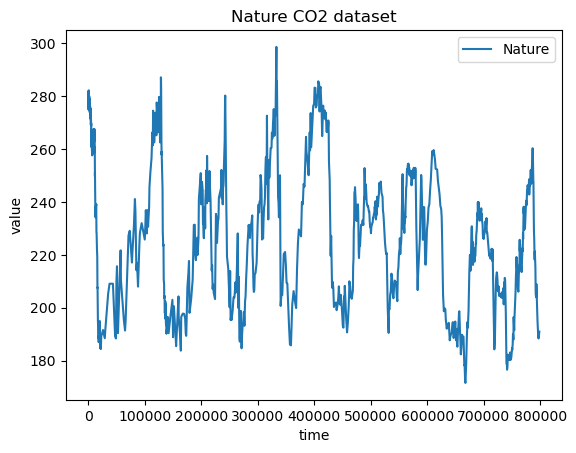

In [75]:
plt.plot(co2_nature['EDC3_gas_a (yr)'],co2_nature['CO2 (ppmv)'], label = 'Nature')
plt.xlabel('time')
plt.ylabel('value')
plt.title('Nature CO2 dataset')
plt.legend()
plt.show()

## IPCC C02 Dataset

https://agupubs.onlinelibrary.wiley.com/doi/pdfdirect/10.1002/2014GL061957
Next dataset to be imported is from IPCC who used the EPICA Dome C CO2 record from  Bereiter et al. (2014). The EPICA Dome C CO2 record is a dataset that provides information about the atmospheric CO2 concentrations over the past 800,000 years, based on the analysis of air bubbles trapped in Antarctic ice cores. The dataset is derived from the EPICA Dome C ice core, which was drilled at a site in East Antarctica with an average annual temperature of -54.5°C and an ice thickness of 3270 m 1.The datset is available https://www.ncei.noaa.gov/access/paleo-search/study/17975.


In [76]:
# Read the Excel file into a pandas DataFrame and exclude inital 14 rows
co2_ipcc = pd.read_excel('imported_datasets/C02 IPCC Report.xlsx',sheet_name= 'CO2 Composite',skiprows=range(14))
co2_ipcc

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007
...,...,...,...
1896,803925.284376,202.921723,2.064488
1897,804009.870607,207.498645,0.915083
1898,804522.674630,204.861938,1.642851
1899,805132.442334,202.226839,0.689587


In [77]:

co2_ipcc.columns = co2_ipcc.columns.str.lstrip()
co2_ipcc.columns = co2_ipcc.columns.str.rstrip()

In [78]:
co2_nature.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
dtype: object

In [79]:
co2_nature.describe()

,EDC3_gas_a (yr),CO2 (ppmv)
count,1096.000000,1096.000000
mean,390905.979015,230.835675
std,262092.947239,27.573616
min,137.000000,171.600000
25%,137133.500000,207.500000
50%,423206.500000,231.450000
75%,627408.000000,251.525000
max,798512.000000,298.600000


Plotting IPCC CO2 Dataset

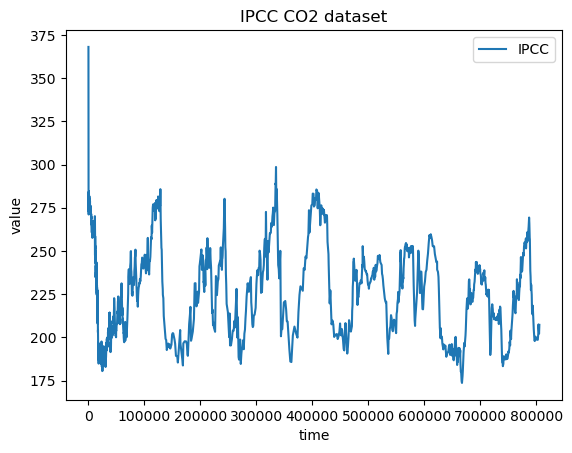

In [80]:
plt.plot(co2_ipcc['Gasage (yr BP)'],co2_ipcc['CO2 (ppmv)'],label = 'IPCC')
plt.xlabel('time')
plt.ylabel('value')
plt.title('IPCC CO2 dataset')
plt.legend()
plt.show()

## Comparing Nature CO2 and IPCC Dataset

From the plot below, we can see that the datasets are very closely aligned, but that the IPCC datset contains more readings.

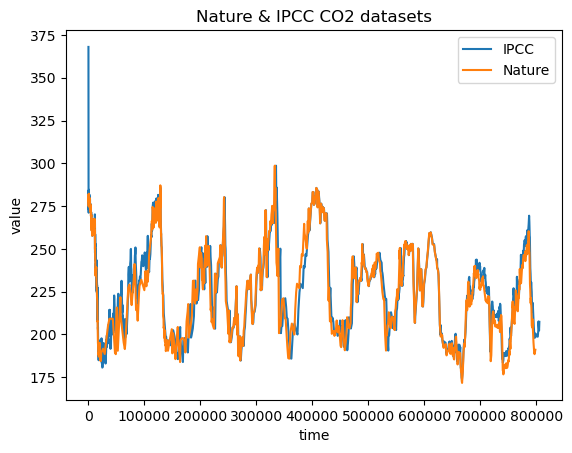

In [81]:
plt.plot(co2_ipcc['Gasage (yr BP)'],co2_ipcc['CO2 (ppmv)'], label = 'IPCC')
plt.plot(co2_nature['EDC3_gas_a (yr)'],co2_nature['CO2 (ppmv)'], label = 'Nature')
plt.xlabel('time')
plt.ylabel('value')
plt.title('Nature & IPCC CO2 datasets')
plt.legend()
plt.show()

## Mauna Loa CO2 dataset

The third C02 datset to import is the Mauna Loa dataset which measures the CO2 concentrations at the Mauna Loa observatorty in Hawaii. This dataset is the longest continuos record of CO2 in the atmosphere, starting in 1958. https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc%3AC00890

In [82]:
co2_mauna_loa=pd.read_csv('imported_datasets/Mauna Loa CO2.csv',skiprows=range(43))
co2_mauna_loa

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12
...,...,...,...
59,2018,408.72,0.12
60,2019,411.65,0.12
61,2020,414.21,0.12
62,2021,416.41,0.12


In [83]:
co2_mauna_loa.dtypes

year      int64
mean    float64
unc     float64
dtype: object

In [84]:
co2_mauna_loa.describe()

,year,mean,unc
count,64.000000,64.000000,6.400000e+01
mean,1990.500000,358.293437,1.200000e-01
std,18.618987,30.580414,9.791247e-17
min,1959.000000,315.980000,1.200000e-01
25%,1974.750000,330.895000,1.200000e-01
50%,1990.500000,355.075000,1.200000e-01
75%,2006.250000,382.572500,1.200000e-01
max,2022.000000,418.530000,1.200000e-01


I will now join the Mauna Loa dataset and the Nature dataset to have a more complete datset to analysie.

I need to change names of columns and convert Mauna Loa data to match format of Nature CO2 dataset to ensure data is fused correctly.

In [85]:
co2_mauna_loa = co2_mauna_loa.rename(columns=(({'year':'EDC3_gas_a (yr)'})))
co2_mauna_loa = co2_mauna_loa.rename(columns=(({'mean':'CO2 (ppmv)'})))

In [86]:
base = 1950
co2_mauna_loa['EDC3_gas_a (yr)'] = base - co2_mauna_loa['EDC3_gas_a (yr)']

In [87]:
co2_mauna_loa

,EDC3_gas_a (yr),CO2 (ppmv),unc
0,-9,315.98,0.12
1,-10,316.91,0.12
2,-11,317.64,0.12
3,-12,318.45,0.12
4,-13,318.99,0.12
...,...,...,...
59,-68,408.72,0.12
60,-69,411.65,0.12
61,-70,414.21,0.12
62,-71,416.41,0.12


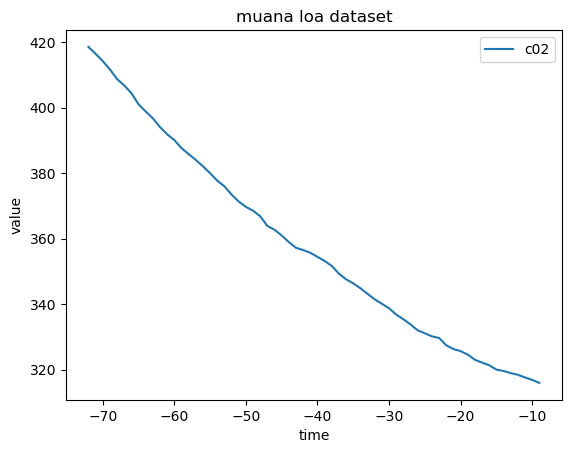

In [88]:
plt.plot(co2_mauna_loa['EDC3_gas_a (yr)'],co2_mauna_loa['CO2 (ppmv)'] ,label ='c02')
plt.xlabel('time')
plt.ylabel('value')
plt.title('muana loa dataset')
plt.legend()
plt.show()

comparing datasets before merging to ensure compatabillity

In [89]:
co2_nature.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
dtype: object

In [90]:
co2_mauna_loa.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
unc                float64
dtype: object

Creating a new dataset called "co2_nature_mauna_loa"

In [91]:
co2_nature_mauna_loa = pd.concat([co2_mauna_loa, co2_nature])
co2_nature_mauna_loa = co2_nature_mauna_loa.drop(['unc'],axis =1)

In [92]:
co2_nature_mauna_loa

,EDC3_gas_a (yr),CO2 (ppmv)
0,-9,315.98
1,-10,316.91
2,-11,317.64
3,-12,318.45
4,-13,318.99
...,...,...
1091,794608,199.40
1092,795202,195.20
1093,796467,189.30
1094,797099,188.40


Plotting co2_nature_mauna_loa dataset.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


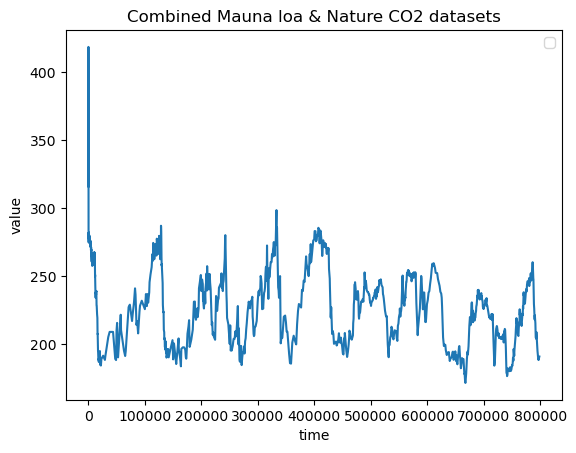

In [93]:
plt.plot(co2_nature_mauna_loa['EDC3_gas_a (yr)'],co2_nature_mauna_loa['CO2 (ppmv)'])
plt.xlabel('time')
plt.ylabel('value')
plt.title('Combined Mauna loa & Nature CO2 datasets')
plt.legend()
plt.show()

In [94]:
co2_nature_mauna_loa.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
dtype: object

In [95]:
co2_nature_mauna_loa.describe()

,EDC3_gas_a (yr),CO2 (ppmv)
count,1160.000000,1160.000000
mean,369336.518103,237.867828
std,269951.176372,40.208643
min,-72.000000,171.600000
25%,114474.750000,208.875000
50%,390921.000000,233.800000
75%,608013.250000,257.250000
max,798512.000000,418.530000


In [96]:
co2_nature_mauna_loa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1160 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EDC3_gas_a (yr)  1160 non-null   int64  
 1   CO2 (ppmv)       1160 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 27.2 KB


*Part of the project scope is to export fused datsets to .csv and .json formats*

In [97]:
co2_nature_mauna_loa.to_csv('fused datasets\co2_nature_mauna_loa.csv', encoding='utf-8', index=False)

In [98]:
#https://stackoverflow.com/questions/39257147/convert-pandas-dataframe-to-json-format
co2_nature_mauna_loa.to_json('fused datasets\co2_nature_mauna_loa.json',orient='records')

In [99]:
co2_nature_mauna_loa

,EDC3_gas_a (yr),CO2 (ppmv)
0,-9,315.98
1,-10,316.91
2,-11,317.64
3,-12,318.45
4,-13,318.99
...,...,...
1091,794608,199.40
1092,795202,195.20
1093,796467,189.30
1094,797099,188.40


As mentioned above,  I have *read* in CO2 datsets from IPCC, Nature and Mauna loa. I have combined the Nature and Mauna Loa datasets to create a more compete dataset. This is the dataset i will use going forward for C02 analysis. 

# Importing and analysing Temperature datasets

I will Import Temperature datsets from NOAA and Jouzel. I will examine each dataset and plot the relevant variables to determine which dataset is most suitable for further analysis.

https://www.ncei.noaa.gov/access/paleo-search/study/6080


In [100]:
temp_noaa=pd.read_csv('imported_datasets/Temp data NOAA.csv',skiprows=range(91),delimiter=r"\s+")
temp_noaa=temp_noaa.dropna()

In [101]:
temp_noaa.head()

,Bag,ztop,Age,Deuterium,Temperature
12,13,6.60,38.37379,-390.9,0.88
13,14,7.15,46.81203,-385.1,1.84
14,15,7.70,55.05624,-377.8,3.04
15,16,8.25,64.41511,-394.1,0.35
16,17,8.80,73.15077,-398.7,-0.42


In [102]:
temp_noaa.describe()

,Bag,ztop,Age,Deuterium,Temperature
count,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000
mean,2907.847364,1598.766050,190506.560624,-417.796420,-4.580228
std,1670.376955,918.707325,192554.547328,18.000275,3.446971
min,13.000000,6.600000,38.373790,-449.500000,-10.580000
25%,1462.000000,803.550000,46793.812500,-432.500000,-7.450000
50%,2908.000000,1598.850000,122110.190000,-421.300000,-5.200000
75%,4354.000000,2394.150000,273338.430000,-403.300000,-1.820000
max,5800.000000,3189.450000,801662.000000,-361.200000,5.460000


In [103]:
temp_noaa.dtypes

Bag              int64
ztop           float64
Age            float64
Deuterium      float64
Temperature    float64
dtype: object

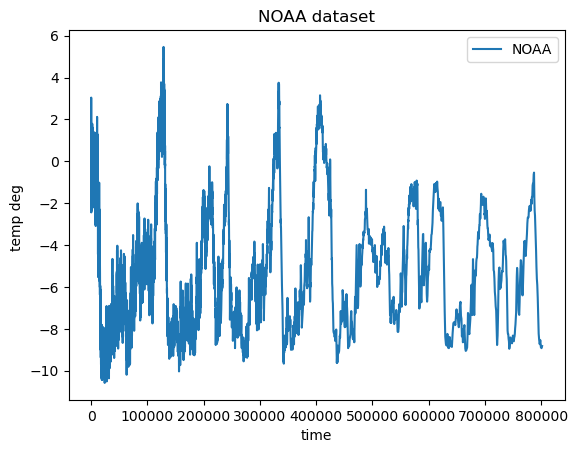

In [104]:
plt.plot(temp_noaa['Age'],temp_noaa['Temperature'], label = 'NOAA')
plt.xlabel('time')
plt.ylabel('temp deg ')
plt.title('NOAA dataset')
plt.legend()
plt.show()

The Jouzel dataset is based on water isotope data from the EPICA Dome C ice core. data from the ice core to estimate the Antarctic temperature variations over the past 800,000 years. https://royalsociety.org/topics-policy/projects/climate-change-evidence-causes/question-6/. The Jouzel datset is availabe from the Pangea website. The temp variable is in Kelvin so I will need to convert to celsius. 

In [105]:
temp_jouzel=pd.read_csv('imported_datasets/Temp Data Jouzel.csv',encoding='Latin')
temp_jouzel

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453
...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000


creating a new column called temp_jouzel, to convert temp column from Kelvin to celsius

In [106]:
temp_jouzel['celsius'] = temp_jouzel['temp'] - 272.15

In [107]:
temp_jouzel.dtypes

bag               int64
ztop            float64
EDC3béta        float64
AICC2012        float64
deutfinal       float64
temp            float64
acc-EDC3beta    float64
celsius         float64
dtype: object

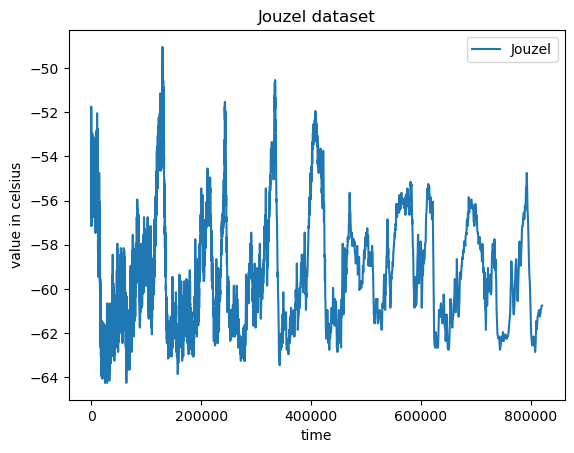

In [108]:
plt.plot(temp_jouzel['EDC3béta'],temp_jouzel['celsius'], label = 'Jouzel')
plt.xlabel('time')
plt.ylabel('value in celsius')
plt.title('Jouzel dataset')
plt.legend()
plt.show()

I now want to compare both datasets and select which dataset will be used.

I will create a new variable called 'difference' which will be a calculation of *temp* variable from Jouzel dataset minus *218.32 which is comparable .88 anomaly value in NOAA dataset

In [109]:
temp_jouzel['difference'] = temp_jouzel['temp'] - 218.32
temp_jouzel

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta,celsius,difference
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321,-53.85,-0.02
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805,-53.85,-0.02
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404,-53.85,-0.02
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025,-53.85,-0.02
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453,-53.85,-0.02
...,...,...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000,-61.15,-7.32
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000,-60.95,-7.12
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000,-60.85,-7.02
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000,-60.75,-6.92


By plotting both datasets we can compare to confirm both are aligned

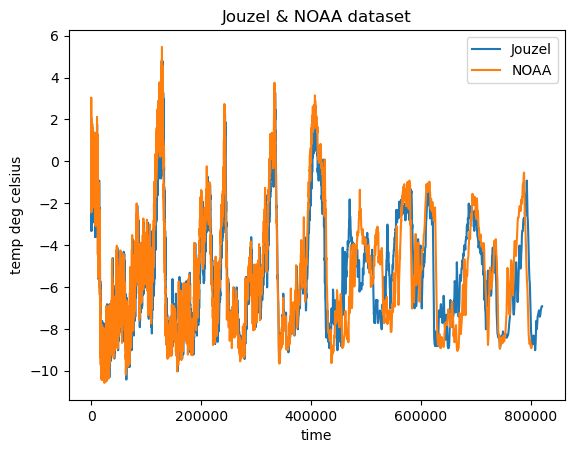

In [110]:
plt.plot(temp_jouzel['EDC3béta'],temp_jouzel['difference'], label = 'Jouzel')
plt.plot(temp_noaa['Age'],temp_noaa['Temperature'], label = 'NOAA')
plt.xlabel('time')
plt.ylabel('temp deg celsius')
plt.title('Jouzel & NOAA dataset')
plt.legend()
plt.show()

In [111]:
temp_jouzel.to_csv('jouzy_temp.csv', encoding='utf-8', index=False)

From the plot above, i can see both datasets are comparable.

As discussed, I have imported both temperature datsets from NOAA and Jouzel. I have examined both datasets and by adding new variables I can confirm both dataset are similar as can be seen from the plots. For further analysis, I will use the NOAA datset

# 3. Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
https://data.world/datasets/methane

This dataset contains the methane concentration measurements from the EPICA Dome C ice core in Antarctica1. The dataset covers a time span of 800,000 years from the present to the last glacial period

In [112]:
#https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt
methane_noaa=pd.read_csv('imported_datasets/Methane NOAA.csv',delimiter=r"\s+")

In [113]:
methane_noaa

,Depth,Age,CH4_mean,1s,Lab.
0,99.34,13,907,10.0,b
1,102.45,126,784,10.0,g
2,102.58,130,762,10.0,b
3,103.34,151,710,10.0,g
4,104.33,184,727,10.0,g
...,...,...,...,...,...
2098,3188.08,794938,428,10.0,g
2099,3188.95,796320,418,10.0,b
2100,3189.43,797277,396,10.0,g
2101,3190.03,798417,458,10.0,g


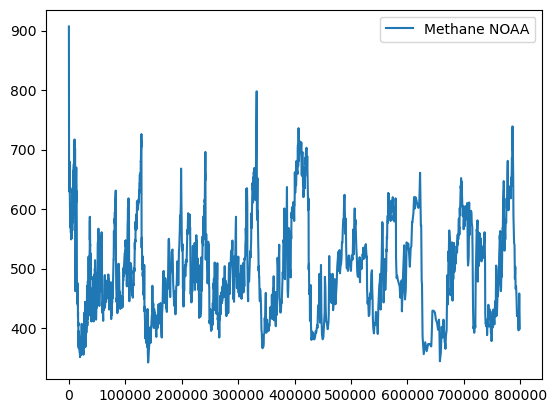

In [114]:
plt.plot(methane_noaa['Age'],methane_noaa['CH4_mean'], label = 'Methane NOAA')
plt.legend()
plt.show()

In [115]:
methane_noaa.dtypes

Depth       float64
Age           int64
CH4_mean      int64
1s          float64
Lab.         object
dtype: object

#https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt

#https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas
#df1=pd.read_csv('summary.csv',delimiter=r"\s+")
#df1 = pd.read_csv("deter.csv",sep = " ")
#df1.describe()
#print(df1['Bag'])

# Examining the Irish context

I will import and analyse two dataset relating to Ireland.The first dataset is Composite Rainfall Time Series from 1711-2016 for Ireland and the second dataset is Ireland MeanTemperatures_1900-2022_annual. I will examine each dataset and plot the relevant variables to determine which dataset is most suitable for further analysis.

In [116]:
comp_irish_rainfall=pd.read_csv('imported_datasets/Composite Rainfall Ireland.csv')

In [117]:
comp_irish_rainfall

,Year,Month,Median montly series
0,1711,1,16.4
1,1711,2,73.1
2,1711,3,121.2
3,1711,4,85.2
4,1711,5,66.6
...,...,...,...
3667,2016,8,79.1
3668,2016,9,108.1
3669,2016,10,51.8
3670,2016,11,58.0


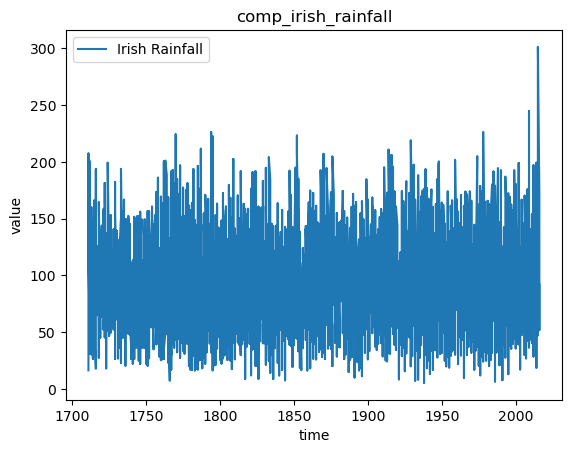

In [118]:
plt.plot(comp_irish_rainfall['Year'],comp_irish_rainfall['Median montly series'], label = 'Irish Rainfall')
plt.xlabel('time')
plt.ylabel('value')
plt.title('comp_irish_rainfall')
plt.legend()
plt.show()

above plot very messy so going to get yearly average

In [119]:
mean_yearly_irish_rainfall=comp_irish_rainfall

In [120]:
print(mean_yearly_irish_rainfall.head())

   Year  Month  Median montly series
0  1711      1                  16.4
1  1711      2                  73.1
2  1711      3                 121.2
3  1711      4                  85.2
4  1711      5                  66.6


In [121]:
yearly_averages = mean_yearly_irish_rainfall.groupby('Year')['Median montly series'].mean()
print(yearly_averages)

Year
1711     90.966667
1712    104.383333
1713     81.875000
1714     73.683333
1715    104.833333
           ...    
2012     98.641667
2013     93.041667
2014    105.225000
2015    112.166667
2016     88.391667
Name: Median montly series, Length: 306, dtype: float64


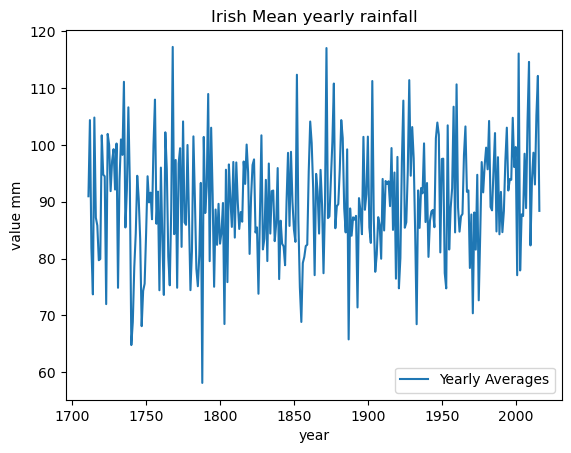

In [122]:
plt.plot(yearly_averages, label='Yearly Averages')
plt.xlabel('year')
plt.ylabel('value mm')
plt.title('Irish Mean yearly rainfall')
plt.legend()
plt.show()

I will Import irish temp datsets from . I will examine each dataset and plot the relebant variables to determine which dataset is most suitable for further analysis.

In [123]:
irish_temp=pd.read_csv('imported_datasets/Ireland MeanTemperatures_1900-2022_annual.csv')

In [124]:
irish_temp

,year,Annual
0,2022,10.9
1,2021,10.5
2,2020,10.4
3,2019,10.5
4,2018,10.3
...,...,...
118,1904,9.1
119,1903,9.1
120,1902,9.2
121,1901,9.1


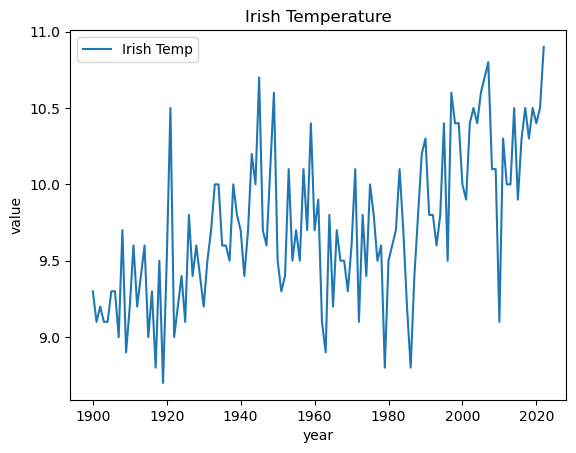

In [125]:
plt.plot(irish_temp['year'],irish_temp['Annual'], label = 'Irish Temp')
plt.xlabel('year')
plt.ylabel('value')
plt.title('Irish Temperature')
plt.legend()
plt.show()

In [126]:
#https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt

#https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas
df17=pd.read_csv('jouzy_temp.csv',delimiter=r"\s+")
#df1 = pd.read_csv("deter.csv",sep = " ")
#df1.describe()
#print(df1['Bag'])


In [127]:
merged1 = pd.concat([df17])

In [128]:
#merged1['blank1'] = 'SPACE'

In [129]:
temp_noaa.head()

,Bag,ztop,Age,Deuterium,Temperature
12,13,6.60,38.37379,-390.9,0.88
13,14,7.15,46.81203,-385.1,1.84
14,15,7.70,55.05624,-377.8,3.04
15,16,8.25,64.41511,-394.1,0.35
16,17,8.80,73.15077,-398.7,-0.42


In [130]:
co2_nature_mauna_loa.head()

,EDC3_gas_a (yr),CO2 (ppmv)
0,-9,315.98
1,-10,316.91
2,-11,317.64
3,-12,318.45
4,-13,318.99


In [131]:
co2_nature_mauna_loa.head()

,EDC3_gas_a (yr),CO2 (ppmv)
0,-9,315.98
1,-10,316.91
2,-11,317.64
3,-12,318.45
4,-13,318.99


In [132]:
methane_noaa.head()

,Depth,Age,CH4_mean,1s,Lab.
0,99.34,13,907,10.0,b
1,102.45,126,784,10.0,g
2,102.58,130,762,10.0,b
3,103.34,151,710,10.0,g
4,104.33,184,727,10.0,g


*Part of the project scope is to export fused datsets to .csv and .json formats*
I will combine 'fused Nature CO2 & Mauna Loa', temperature dataset from NOAA, methane dataset from NOAA,

In [243]:
fused_datasets = pd.concat([co2_nature_mauna_loa,temp_noaa, methane_noaa,comp_irish_rainfall,mean_yearly_irish_rainfall,irish_temp,merged1], ignore_index=True)
fused_datasets

,EDC3_gas_a (yr),CO2 (ppmv),Bag,ztop,Age,Deuterium,Temperature,Depth,CH4_mean,1s,Lab.,Year,Month,Median montly series,year,Annual,"bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta,celsius,difference"
0,-9.0,315.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-10.0,316.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-11.0,317.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-12.0,318.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-13.0,318.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5815,3197.7,816871.6,817562.0,-432.2,211.0,1.5..."
22330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5816,3198.25,817693.6,818631.0,-431.4,211.2,1...."
22331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5817,3198.8,818505.5,819700.0,-430.3,211.3,1.5..."
22332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5818,3199.35,819303.1,820769.0,-429.8,211.4,1...."


In [244]:
fused_datasets.to_csv('fused datasets\combined_datasets.csv', encoding='utf-8')
#merged_datasets=merged_datasets.dropna()

In [245]:
#https://researchdatapod.com/how-to-solve-python-typeerror-object-of-type-dataframe-is-not-json-serializable/

fused_datasets.to_json('fused datasets\combined_datasets.json',orient='split')

In [273]:
# #https://stackoverflow.com/questions/34926517/stop-sys-stdout-from-writing-to-a-text-file



https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file

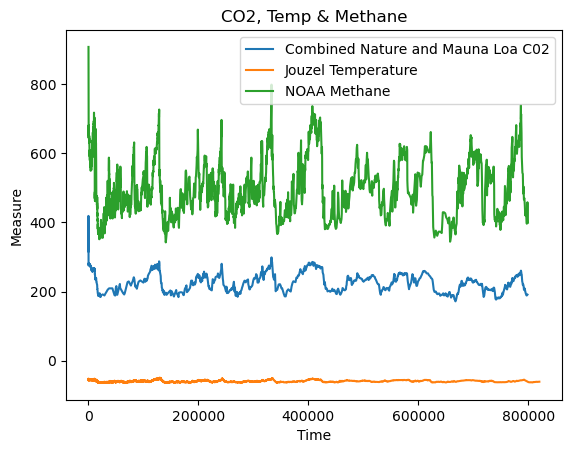

In [280]:
plt.plot(co2_nature_mauna_loa['EDC3_gas_a (yr)'],co2_nature_mauna_loa['CO2 (ppmv)'], label = 'Combined Nature and Mauna Loa C02')
plt.plot(temp_jouzel['EDC3béta'],temp_jouzel['celsius'], label = 'Jouzel Temperature')
plt.plot(methane_noaa['Age'],methane_noaa['CH4_mean'], label = 'NOAA Methane')
plt.xlabel('Time')
plt.ylabel('Measure')
plt.title('CO2, Temp & Methane')
plt.legend()
plt.show()

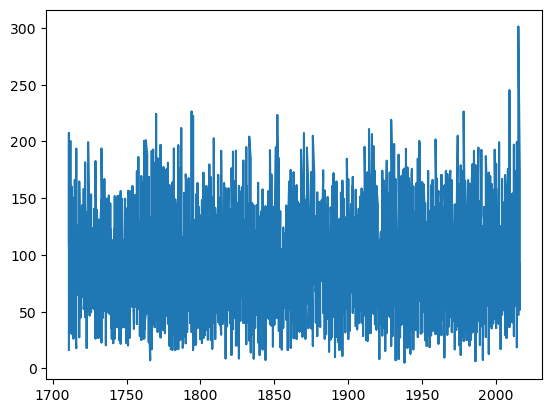

In [281]:
plt.plot(comp_irish_rainfall['Year'],comp_irish_rainfall['Median montly series'], label = 'Irish Temp')

https://stackoverflow.com/questions/39257147/convert-pandas-dataframe-to-json-format

MACHINELEARNINGMASTERY.COM
FREQUENCY ANALYSIS ??

In [ ]:
#r = np.corrcoef(temp_jouzel.loc[:1095,'celsius'],df17.loc[:1095,'CH4 mean'])
#print("Correlation coefficient: between Wind Speed (Knot) & Synthesised Wind Speed (Knot) is ", r)
#r

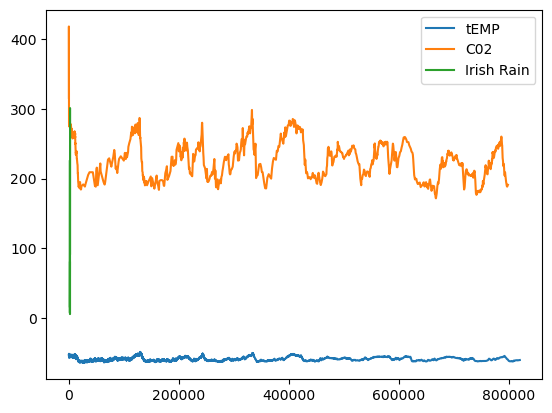

In [ ]:
plt.plot(temp_jouzel['EDC3béta'],temp_jouzel['celsius'], label = 'tEMP')
plt.plot(co2_nature_mauna_loa['EDC3_gas_a (yr)'],co2_nature_mauna_loa['CO2 (ppmv)'], label = 'C02')
#plt.plot(df17['gas age (edc3_gas_a)'],df17['CH4 mean'], label = 'Methane')
plt.plot(comp_irish_rainfall['Year'],comp_irish_rainfall['Median montly series'], label = 'Irish Rain')
plt.legend()
plt.show()

# Fourier transform 

In [ ]:

# Read the dataset from a CSV file
#df = pd.read_excel('C02 Nature Paper.xlsx',sheet_name='3.  Composite CO2' ,skiprows=range(6))

# Select the column with CO2 (ppmv) values
y = co2_nature['CO2 (ppmv)']
y = np.ascontiguousarray(y)


In [ ]:
yf = fft(y) # Frequency spectrum
xf = fftfreq(y.size)

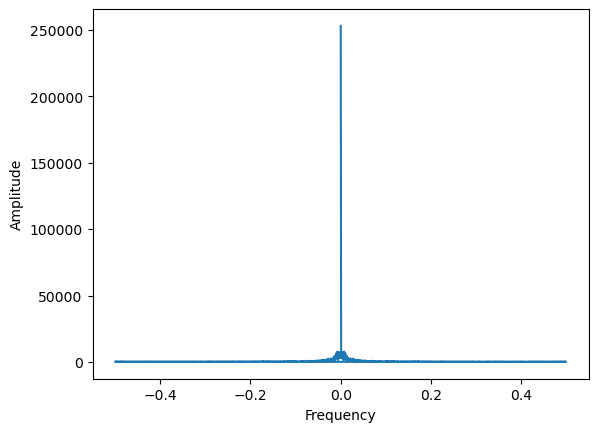

In [ ]:
plt.plot(xf, np.abs(yf)) # Plot the magnitude of the spectrum
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

# FOURIER
https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/

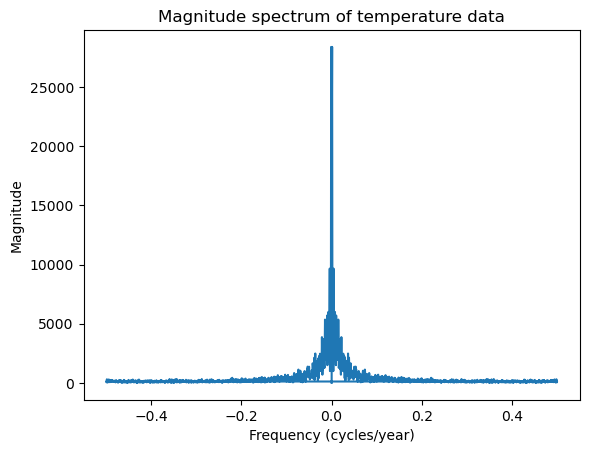

In [ ]:
# Extract the temperature column as a numpy array
temp = co2_ipcc["CO2 (ppmv)"].to_numpy()

# Subtract the mean to concentrate on temperature fluctuations
temp = temp - np.mean(temp)

# Perform the Fourier transform
Temp = np.fft.fft(temp) # complex spectrum
Temp_mag = np.abs(Temp) # magnitude spectrum
Temp_phase = np.angle(Temp) # phase spectrum
f = np.fft.fftfreq(len(temp), 1) # frequency vector in cycles per year

# Plot the magnitude spectrum in frequency domain
plt.figure()
plt.plot(f, Temp_mag)
plt.xlabel("Frequency (cycles/year)")
plt.ylabel("Magnitude")
plt.title("Magnitude spectrum of temperature data")
#plt.xlim(0, -.5) # zoom in to see the peaks
plt.show()

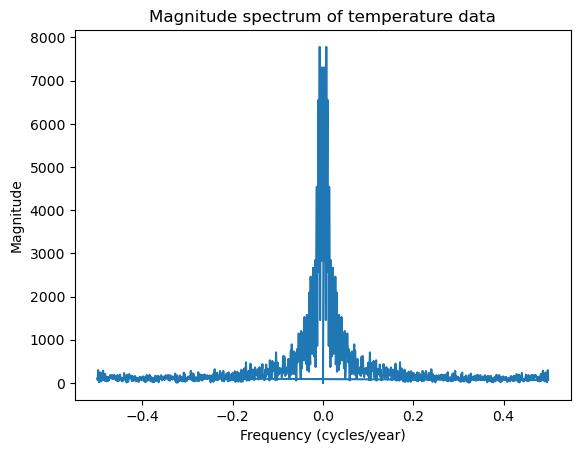

In [ ]:

# Extract the temperature column as a numpy array
temp = co2_nature["CO2 (ppmv)"].to_numpy()

# Subtract the mean to concentrate on temperature fluctuations
temp = temp - np.mean(temp)

# Perform the Fourier transform
Temp = np.fft.fft(temp) # complex spectrum
Temp_mag = np.abs(Temp) # magnitude spectrum
Temp_phase = np.angle(Temp) # phase spectrum
f = np.fft.fftfreq(len(temp), 1) # frequency vector in cycles per year

# Plot the magnitude spectrum in frequency domain
plt.figure()
plt.plot(f, Temp_mag)
plt.xlabel("Frequency (cycles/year)")
plt.ylabel("Magnitude")
plt.title("Magnitude spectrum of temperature data")
#plt.xlim(0, -.5) # zoom in to see the peaks
plt.show()

from sklearn.linear_model import LinearRegression
# Create a linear regression model to predict global temperature based on CO2 levels
X = co2_nature_mauna_loa['CO2 (ppmv)'].values.reshape(-1, 1)
y = temp_noaa2['Temperature'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

# Print the model coefficients
#print(f'Intercept: {model.intercept_[0]:.2f}')
#print(f'Slope: {model.coef_[0][0]:.2f}')

https://stackoverflow.com/questions/41492882/find-time-shift-of-two-signals-using-cross-correlation

In [ ]:
methane_noaa

,Depth,Age,CH4_mean,1s,Lab.
0,99.34,13,907,10.0,b
1,102.45,126,784,10.0,g
2,102.58,130,762,10.0,b
3,103.34,151,710,10.0,g
4,104.33,184,727,10.0,g
...,...,...,...,...,...
2098,3188.08,794938,428,10.0,g
2099,3188.95,796320,418,10.0,b
2100,3189.43,797277,396,10.0,g
2101,3190.03,798417,458,10.0,g


In [ ]:
ts1=co2_nature_mauna_loa['CO2 (ppmv)']
ts2=temp_noaa['Temperature']
ts3=methane_noaa['CH4_mean']
ts4=yearly_averages
ts6=irish_temp['Annual']

In [ ]:


corr = signal.correlate(ts1,ts2,mode='same')

n = len(corr)
lags = np.linspace(-n/2, n/2, n)

# Find the lag that corresponds to the maximum cross-correlation
max_lag = lags[np.argmax(corr)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


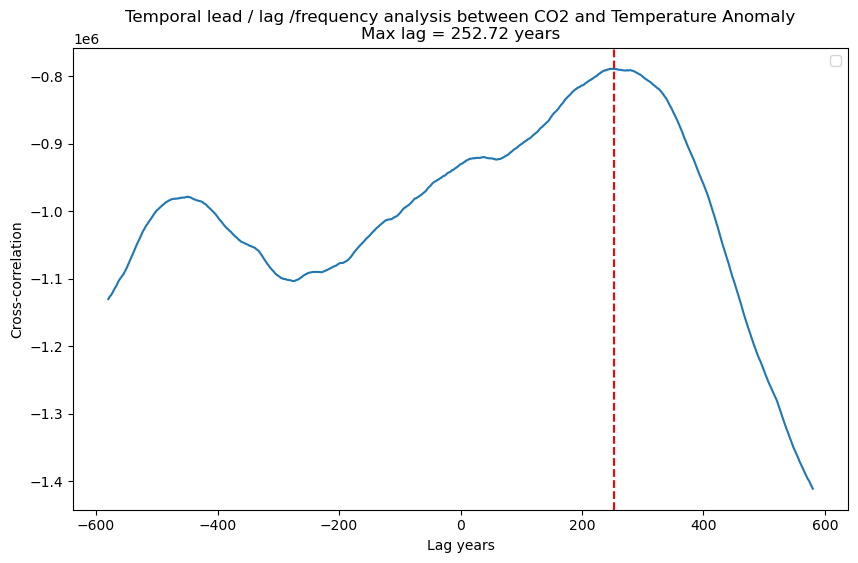

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(lags, corr)
plt.axvline(max_lag, color='red', linestyle='--')
plt.xlabel('Lag years')
plt.ylabel('Cross-correlation')
plt.title(f'Temporal lead / lag /frequency analysis between CO2 and Temperature Anomaly\nMax lag = {max_lag:.2f} years')
plt.legend()
plt.show()

In [ ]:
corr = signal.correlate(ts2,ts3,mode='same')

n = len(corr)
lags = np.linspace(-n/2, n/2, n)

# Find the lag that corresponds to the maximum cross-correlation
max_lag = lags[np.argmax(corr)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


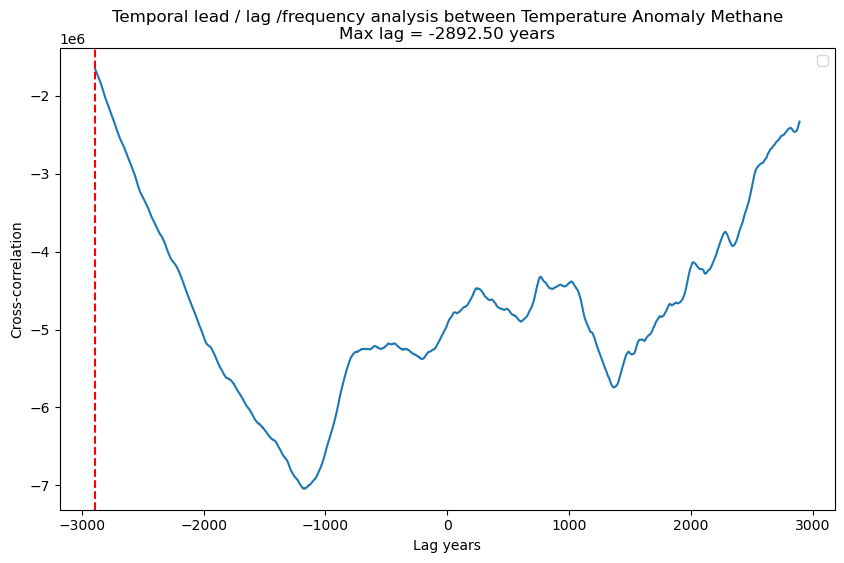

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(lags, corr)
plt.axvline(max_lag, color='red', linestyle='--')
plt.xlabel('Lag years')
plt.ylabel('Cross-correlation')
plt.title(f'Temporal lead / lag /frequency analysis between Temperature Anomaly Methane\nMax lag = {max_lag:.2f} years')
plt.legend()
plt.show()

In [ ]:
corr = signal.correlate(ts1,ts4,mode='same')

n = len(corr)
lags = np.linspace(-n/2, n/2, n)

# Find the lag that corresponds to the maximum cross-correlation
max_lag = lags[np.argmax(corr)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


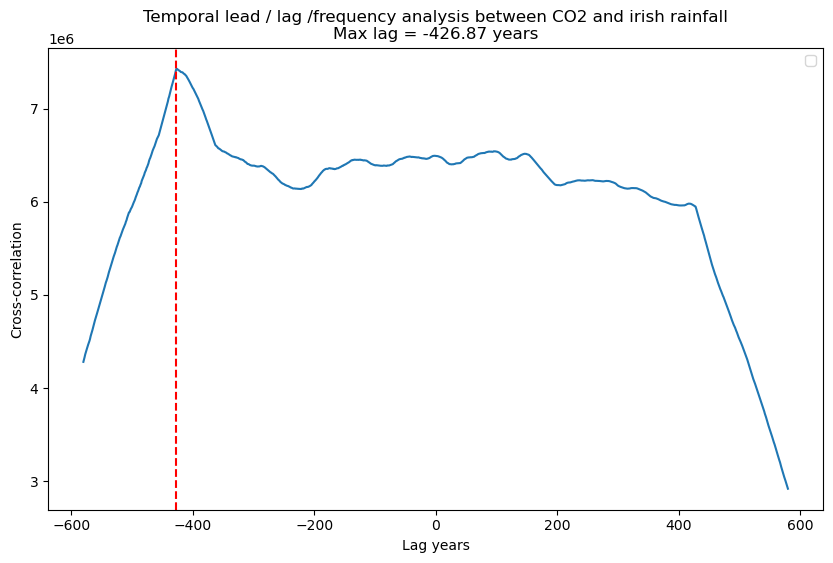

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(lags, corr)
plt.axvline(max_lag, color='red', linestyle='--')
plt.xlabel('Lag years')
plt.ylabel('Cross-correlation')
plt.title(f'Temporal lead / lag /frequency analysis between CO2 and irish rainfall\nMax lag = {max_lag:.2f} years')
plt.legend()
plt.show()

In [ ]:
corr = signal.correlate(ts1,ts6,mode='same')

n = len(corr)
lags = np.linspace(-n/2, n/2, n)

# Find the lag that corresponds to the maximum cross-correlation
max_lag = lags[np.argmax(corr)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


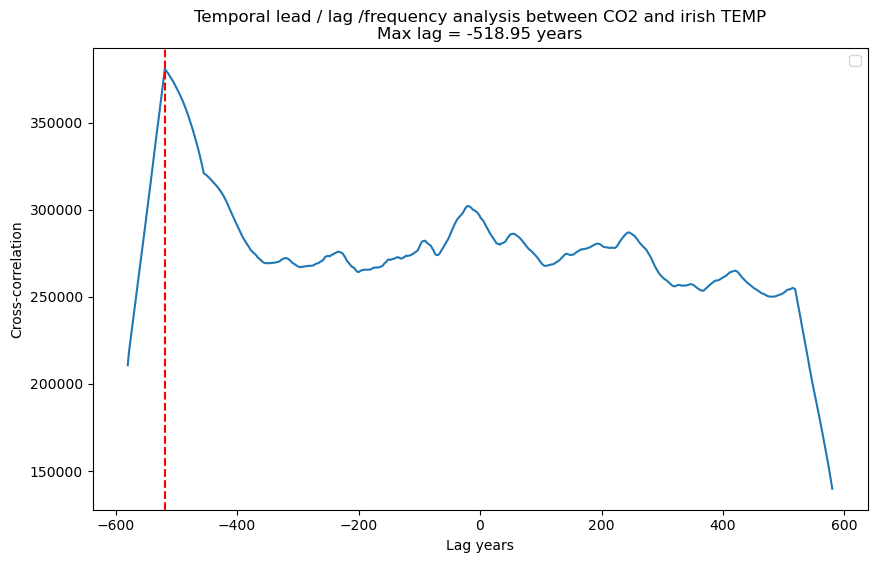

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(lags, corr)
plt.axvline(max_lag, color='red', linestyle='--')
plt.xlabel('Lag years')
plt.ylabel('Cross-correlation')
plt.title(f'Temporal lead / lag /frequency analysis between CO2 and irish TEMP\nMax lag = {max_lag:.2f} years')
plt.legend()
plt.show()

# Frequency Analysis

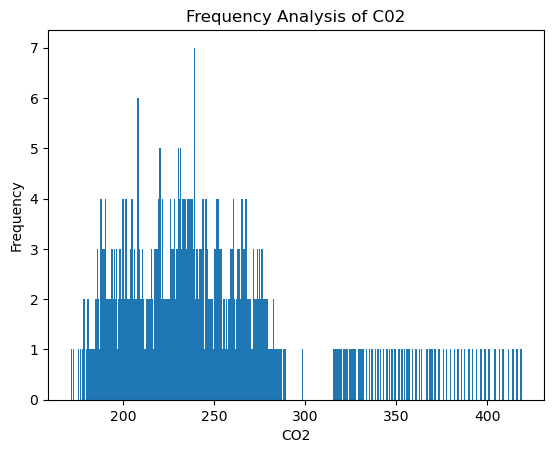

In [ ]:
freq = ts1.value_counts()

#plot the frequencies as a bar chart
plt.bar(freq.index, freq.values)
plt.xlabel("CO2")
plt.ylabel("Frequency")
plt.title("Frequency Analysis of C02")
plt.show()

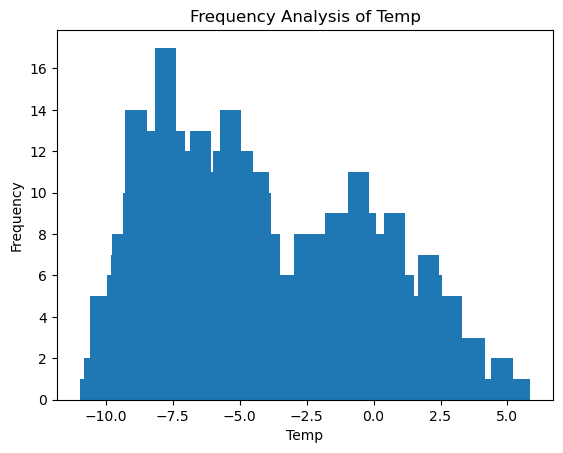

In [ ]:
freq = ts2.value_counts()

#plot the frequencies as a bar chart
plt.bar(freq.index, freq.values)
plt.xlabel("Temp")
plt.ylabel("Frequency")
plt.title("Frequency Analysis of Temp")
plt.show()

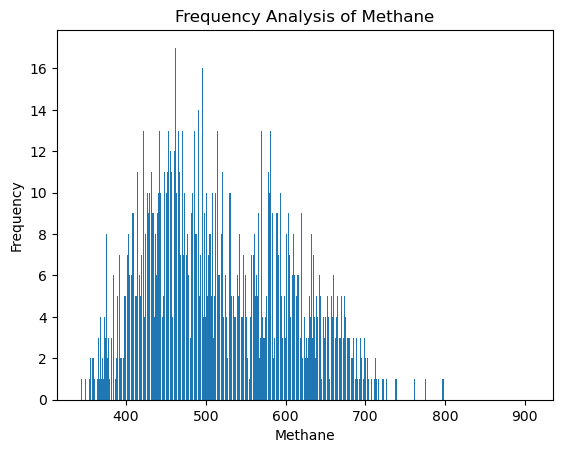

In [ ]:
freq = ts3.value_counts()

#plot the frequencies as a bar chart
plt.bar(freq.index, freq.values)
plt.xlabel("Methane")
plt.ylabel("Frequency")
plt.title("Frequency Analysis of Methane")
plt.show()

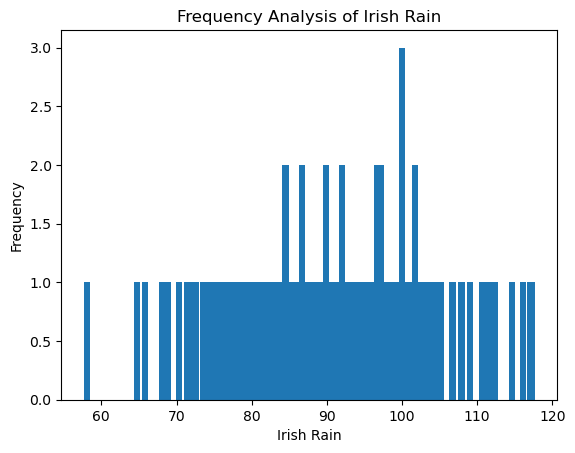

In [ ]:
freq = ts4.value_counts()

#plot the frequencies as a bar chart
plt.bar(freq.index, freq.values)
plt.xlabel("Irish Rain")
plt.ylabel("Frequency")
plt.title("Frequency Analysis of Irish Rain")
plt.show()

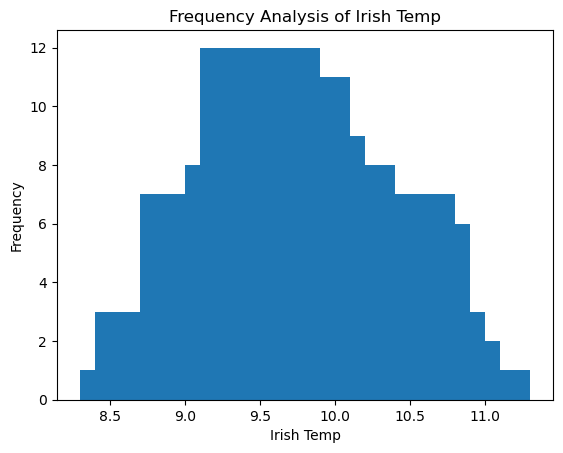

In [ ]:
freq = ts6.value_counts()

#plot the frequencies as a bar chart
plt.bar(freq.index, freq.values)
plt.xlabel("Irish Temp")
plt.ylabel("Frequency")
plt.title("Frequency Analysis of Irish Temp")
plt.show()

# Fit a linear regression model to the data
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = data['Year'].dt.year.values.reshape(-1, 1) # Reshape year column to 2D array
y = data['temp_anomaly'].values # Extract temp_anomaly column as 1D array
model.fit(X, y) # Train the model
y_pred = model.predict(X) # Make predictions
#print(f'Linear regression equation: y = {model.coef_[0]:.4f} * x + {model.intercept_:.4f}')
#print(f'R-squared score: {model.score(X, y):.4f}')

# Plot the regression line
plt.plot(data['Year'], y_pred, color='red', label='Regression line')
plt.scatter(data['Year'], data['temp_anomaly'], label='Observed data')
plt.xlabel('Year')
plt.ylabel('Global temperature anomaly (°C)')
plt.title('Linear regression on global temperature anomaly')
plt.legend()
plt.show()




future_years1 = pd.date_range(start='2020', end='2070', freq='Y') # Create a date range of future years
future_X1 = future_years.year.values.reshape(-1, 1) # Reshape to 2D array
future_y_pred1 = model.predict(future_X1) # Make predictions
future_y_pred1

plt.plot(future_y_pred1, color='green', label='Predicted data')
plt.xlabel('Year')
plt.ylabel('Global temperature anomaly (°C)')
plt.title('Predicted global temperature anomaly from 2020 to 2070')
plt.legend()
plt.show()

In [ ]:
##https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series/tutorial
mean_temp_anomaly =pd.read_csv('imported_datasets/Mean temp anomaly 1985-2023.csv')

In [ ]:
mean_temp_anomaly.head()

,year,anomaly
0,1985,0.497300
1,1986,0.095687
2,1987,0.243026
3,1988,0.282152
4,1989,0.179250


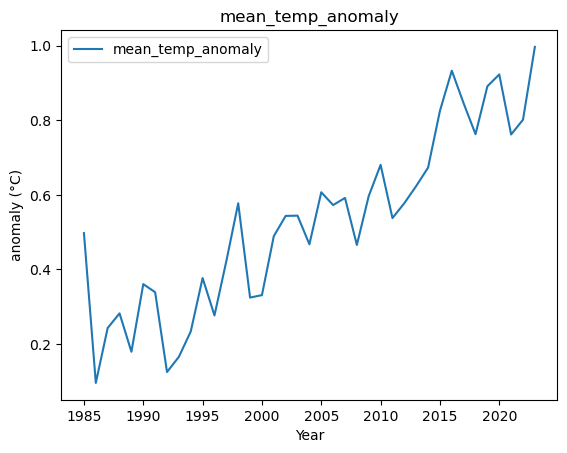

In [ ]:
plt.plot(mean_temp_anomaly['year'],mean_temp_anomaly['anomaly'], label = 'mean_temp_anomaly')
plt.xlabel('Year')
plt.ylabel('anomaly (°C)')
plt.title('mean_temp_anomaly')
plt.legend()
plt.show()

In [ ]:
mean_temp_anomaly = mean_temp_anomaly.copy()
mean_temp_anomaly['time'] = np.arange(len(mean_temp_anomaly.index))
mean_temp_anomaly.head()

,year,anomaly,time
0,1985,0.497300,0
1,1986,0.095687,1
2,1987,0.243026,2
3,1988,0.282152,3
4,1989,0.179250,4


In [ ]:
#from sklearn.linear_model import LinearRegression

# Training data
xt = mean_temp_anomaly.loc[:, ['time']]  # features
yt = mean_temp_anomaly.loc[:, 'anomaly']  # target

# Train the model
model = LinearRegression()
model.fit(xt, yt)

# Store the fitted values as a time series with the same time index as
# the training data
y_predt = pd.Series(model.predict(xt), index=xt.index)

In [ ]:
future_years = pd.date_range(start='2025', end='2064', freq='Y') # Create a date range of future years

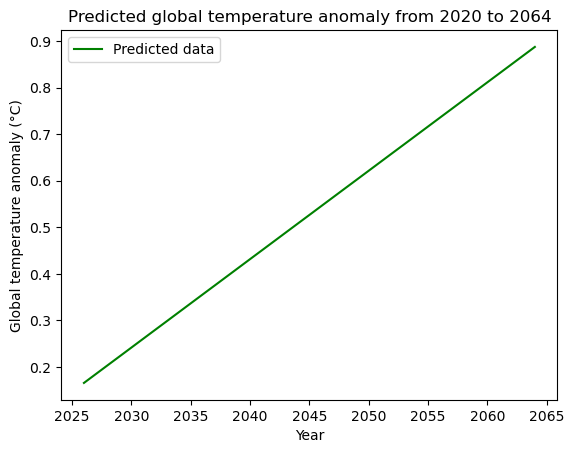

In [ ]:
plt.plot( future_years,y_predt, color='green', label='Predicted data')
plt.xlabel('Year')
plt.ylabel('Global temperature anomaly (°C)')
plt.title('Predicted global temperature anomaly from 2020 to 2064')
plt.legend()
plt.show()

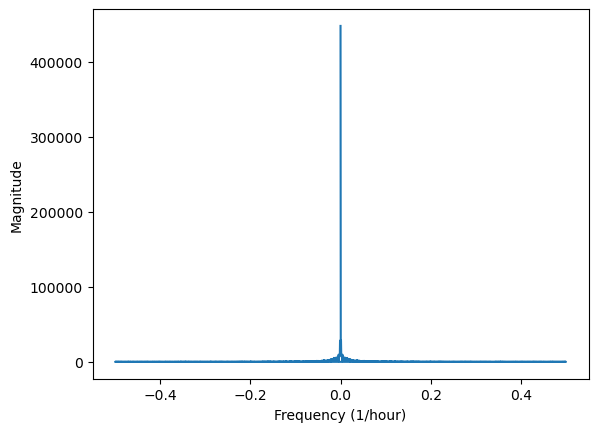

In [ ]:
#temp = pd.read_csv("temp_data.csv")

# Extract the CO2 column as a numpy array
y = co2_ipcc["CO2 (ppmv)"].to_numpy()

# Assume the data is sampled at a constant rate of 1 hour
T = 1.0 # Sample spacing
N = len(y) # Number of sample points

# Compute the Fourier transform and the frequencies
yf = fft(y) # Fourier transform
xf = fftfreq(N, T) # Frequencies

# Plot the magnitude of the Fourier transform
import matplotlib.pyplot as plt
plt.plot(xf, np.abs(yf))
plt.xlabel("Frequency (1/hour)")
plt.ylabel("Magnitude")
plt.show()

# Extract the temperature column as a numpy array
temp = co2_ipcc["CO2 (ppmv)"].to_numpy()

# Subtract the mean to concentrate on temperature fluctuations
temp = temp - np.mean(temp)

# Perform the Fourier transform
Temp = np.fft.fft(temp) # complex spectrum
Temp_mag = np.abs(Temp) # magnitude spectrum
Temp_phase = np.angle(Temp) # phase spectrum
f = np.fft.fftfreq(len(temp), 1) # frequency vector in cycles per year

# Plot the magnitude spectrum in frequency domain
plt.figure()
plt.plot(f, Temp_mag)
plt.xlabel("Frequency (cycles/year)")
plt.ylabel("Magnitude")
plt.title("Magnitude spectrum of temperature data")
#plt.xlim(0, -.5) # zoom in to see the peaks
plt.show()